In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
from wordcloud import WordCloud

In [5]:
train_data = pd.read_csv(r"C:\Users\Mayur23\OneDrive\Desktop\Prodigy Infotech\DS_Task_04\twitter_training.csv")
print(train_data.head())

   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...     


In [6]:
print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74681 entries, 0 to 74680
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   74681 non-null  int64 
 1   Borderlands                                            74681 non-null  object
 2   Positive                                               74681 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB
None


In [36]:
train_data.shape

(74682, 4)

In [37]:
train_data.describe

<bound method NDFrame.describe of            Entity Sentiment  \
2401  Borderlands  Positive   
2401  Borderlands  Positive   
2401  Borderlands  Positive   
2401  Borderlands  Positive   
2401  Borderlands  Positive   
...           ...       ...   
9200       Nvidia  Positive   
9200       Nvidia  Positive   
9200       Nvidia  Positive   
9200       Nvidia  Positive   
9200       Nvidia  Positive   

                                                Message  \
2401  im getting on borderlands and i will murder yo...   
2401  I am coming to the borders and I will kill you...   
2401  im getting on borderlands and i will kill you ...   
2401  im coming on borderlands and i will murder you...   
2401  im getting on borderlands 2 and i will murder ...   
...                                                 ...   
9200  Just realized that the Windows partition of my...   
9200  Just realized that my Mac window partition is ...   
9200  Just realized the windows partition of my Mac ...   
920

In [12]:
column_names = ['Entity', 'Sentiment', 'Message']
train_data = pd.read_csv(r"C:\Users\Mayur23\OneDrive\Desktop\Prodigy Infotech\DS_Task_04\twitter_training.csv", header=None, names=column_names)

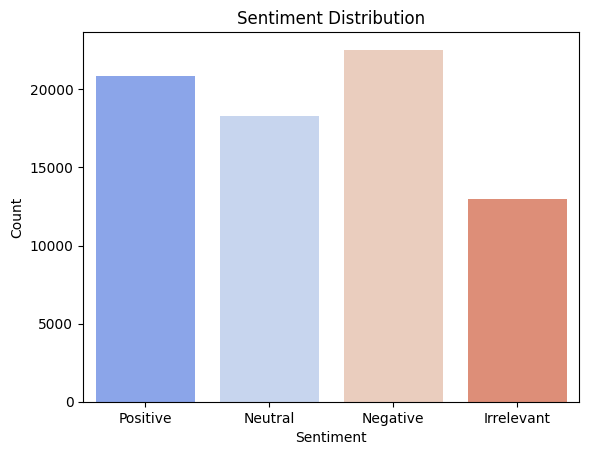

In [32]:
sns.countplot(data=train_data, x='Sentiment', hue='Sentiment', palette='coolwarm', dodge=False)
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.legend([], [], frameon=False)
plt.show()

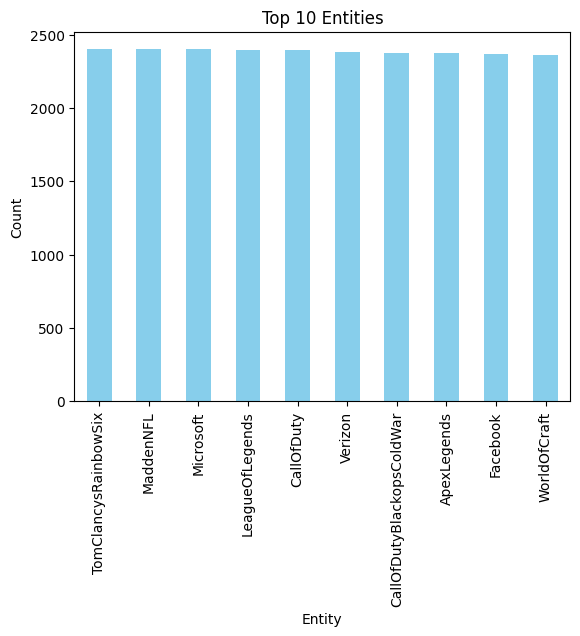

In [14]:
entity_counts = train_data['Entity'].value_counts().head(10)
entity_counts.plot(kind='bar', color='skyblue')
plt.title("Top 10 Entities")
plt.xlabel("Entity")
plt.ylabel("Count")
plt.show()

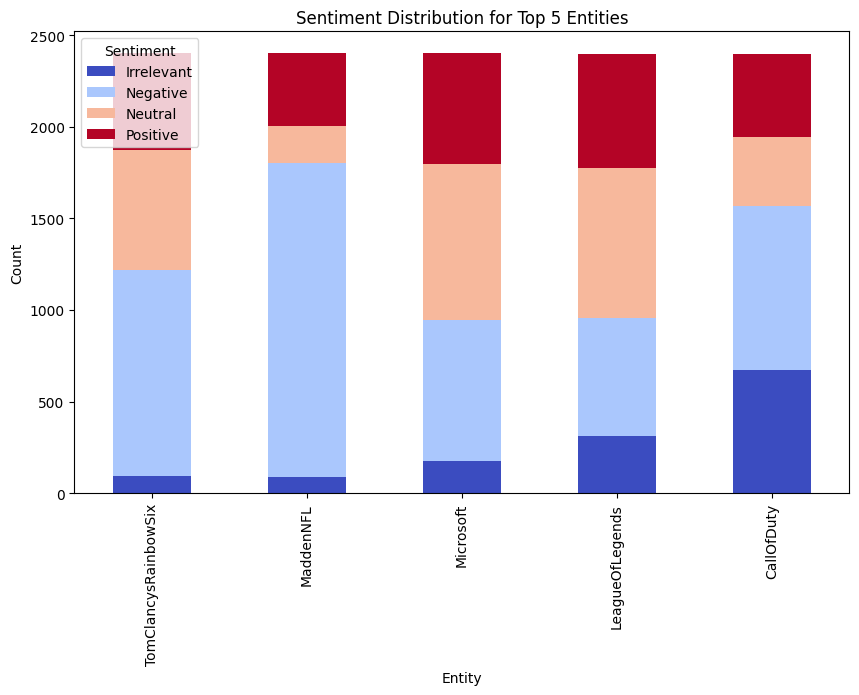

In [18]:
entity_sentiment = train_data.groupby(['Entity', 'Sentiment']).size().unstack().fillna(0)

top_entities = entity_counts.index[:5]
entity_sentiment.loc[top_entities].plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')
plt.title("Sentiment Distribution for Top 5 Entities")
plt.xlabel("Entity")
plt.ylabel("Count")
plt.legend(title="Sentiment")
plt.show()

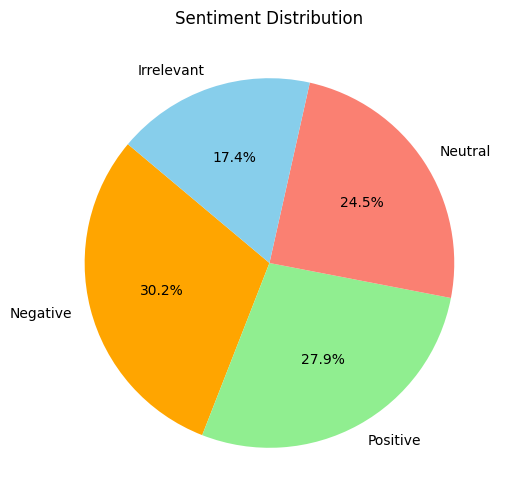

In [27]:
sentiment_counts = train_data['Sentiment'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(
    sentiment_counts,
    labels=sentiment_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=['orange','lightgreen', 'salmon', 'skyblue']
)
plt.title("Sentiment Distribution")
plt.show()

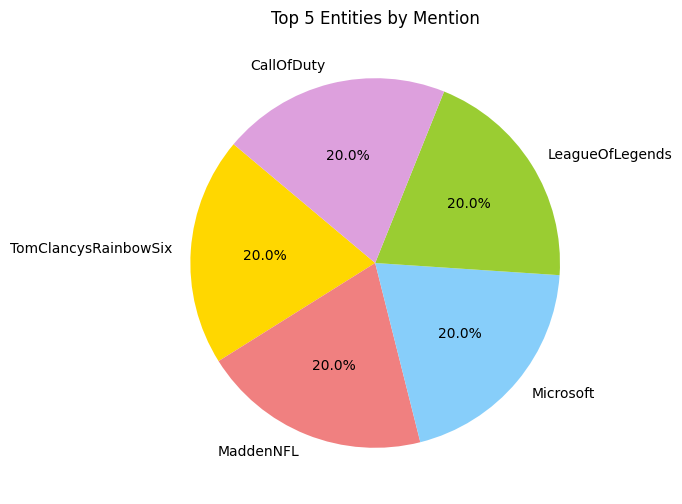

In [33]:
top_entities = train_data['Entity'].value_counts().head(5)

# Plot a pie chart
plt.figure(figsize=(8, 6))
plt.pie(
    top_entities,
    labels=top_entities.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=['gold', 'lightcoral', 'lightskyblue', 'yellowgreen', 'plum']
)
plt.title("Top 5 Entities by Mention")
plt.show()